## 4-1. 인구현황 데이터 분석
### 1. 지역별 총인구수 Top5

In [106]:
import pandas as pd

data = pd.read_csv('../data/인구현황.csv')
# 행정기관==전국인 row 제거
data = data.drop(0)

data.head()

,행정기관코드,행정기관,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
1,1100000000,서울특별시,9331828,4482063,2.08,4505355,4826473,0.93
2,2600000000,부산광역시,3266598,1570403,2.08,1589912,1676686,0.95
3,2700000000,대구광역시,2363629,1104130,2.14,1159601,1204028,0.96
4,2800000000,인천광역시,3021010,1373827,2.20,1509243,1511767,1.00
5,2900000000,광주광역시,1408422,658075,2.14,695224,713198,0.97


In [107]:
data.loc[:, ['행정기관', '총인구수']].sort_values(by='총인구수', ascending=False).head()

,행정기관,총인구수
9,경기도,13694685
1,서울특별시,9331828
2,부산광역시,3266598
16,경상남도,3228380
4,인천광역시,3021010


### 1-1. 지역별 총인구수 plot

In [108]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

font_path = 'C:\\Windows\\Fonts\\malgun.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family = font_name)

Figure(1800x600)
Axes(0.125,0.11;0.775x0.77)


Text(0.5, 1.0, '지역별 총인구수')

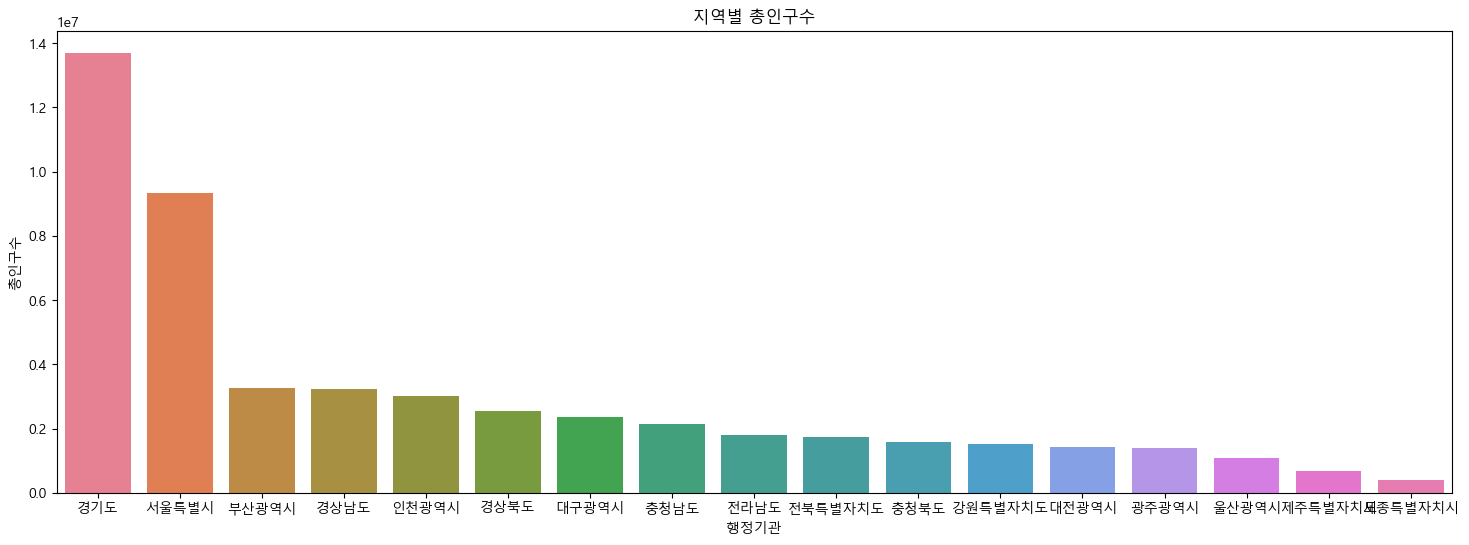

In [109]:
figure, axes1 = plt.subplots(nrows=1, ncols=1)

figure.set_size_inches(18,6)
print(figure)
print(axes1)

pop_plt = sns.barplot(data=data.sort_values(by='총인구수',ascending=False),x='행정기관',y='총인구수',ax=axes1,hue='행정기관')
pop_plt.set_title('지역별 총인구수')

### 2. 세대당 인구수 높은 지역 Top5

In [110]:
data.loc[:, ['행정기관', '세대당 인구']].sort_values(by='세대당 인구', ascending=False).head()

,행정기관,세대당 인구
8,세종특별자치시,2.39
9,경기도,2.26
7,울산광역시,2.22
4,인천광역시,2.20
3,대구광역시,2.14


### 2-1. 지역별 세대당 인구 Plot

Figure(1800x600)
Axes(0.125,0.11;0.775x0.77)


Text(0.5, 1.0, '지역별 세대당 인구')

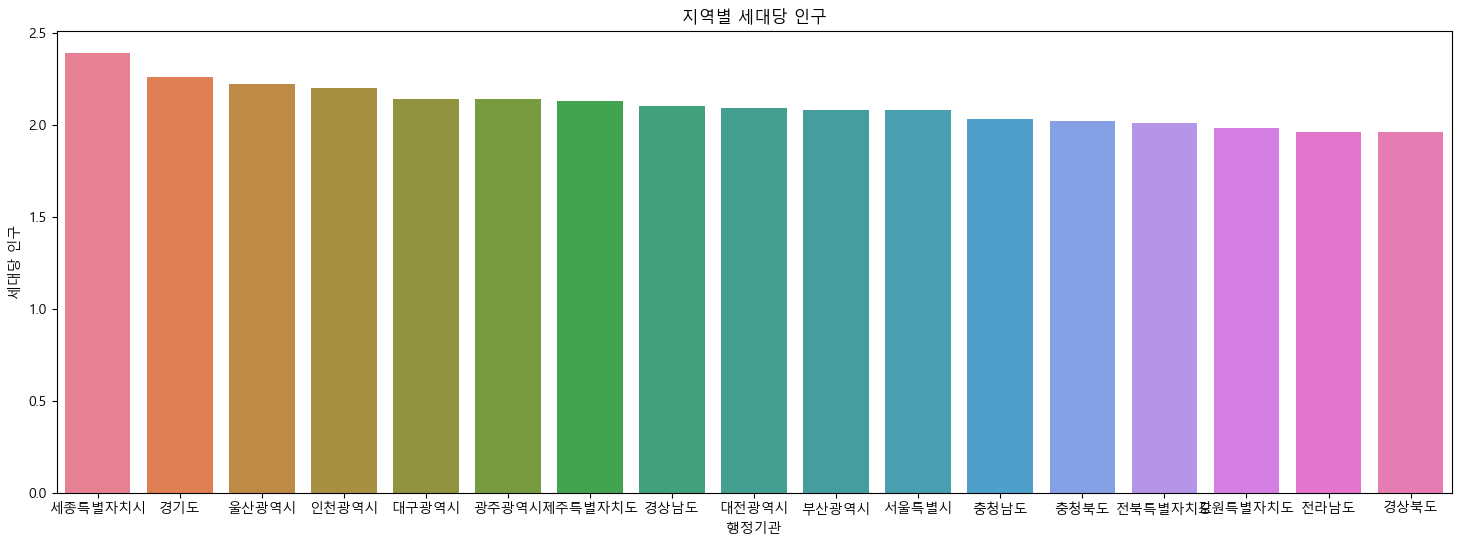

In [111]:
figure, axes1 = plt.subplots(nrows=1, ncols=1)

figure.set_size_inches(18,6)
print(figure)
print(axes1)

pop = sns.barplot(data=data.sort_values(by='세대당 인구',ascending=False),x='행정기관',y='세대당 인구',ax=axes1,hue='행정기관')
pop.set_title('지역별 세대당 인구')

### 3. 남녀 비율 분석

In [112]:
data.loc[:, ['행정기관', '남여 비율']].sort_values(by='남여 비율', ascending=False)

,행정기관,남여 비율
7,울산광역시,1.06
12,충청남도,1.05
11,충청북도,1.04
16,경상남도,1.02
15,경상북도,1.02
14,전라남도,1.02
9,경기도,1.01
10,강원특별자치도,1.01
17,제주특별자치도,1.00
4,인천광역시,1.00


### 3-1. 남녀 비율 분석 Plot

Figure(1800x600)
Axes(0.125,0.11;0.775x0.77)


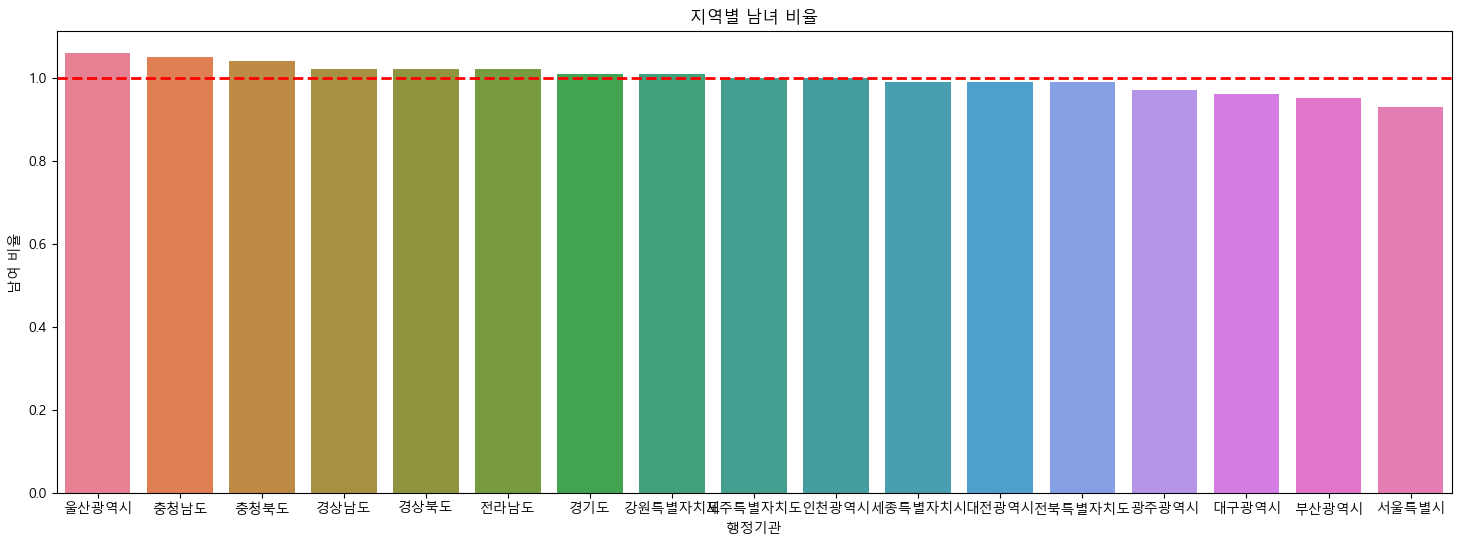

In [113]:
figure, axes1 = plt.subplots(nrows=1, ncols=1)

figure.set_size_inches(18,6)
print(figure)
print(axes1)

gen_plt = sns.barplot(data=data.sort_values(by='남여 비율',ascending=False),x='행정기관',y='남여 비율',ax=axes1,hue='행정기관')
gen_plt.set_title('지역별 남녀 비율')
plt.axhline(1.0, color='red', linestyle='--', linewidth=2)

### 4. 남자초과 / 여자초과 분석

In [114]:
for idx, row in data.iterrows():
    if row['남여 비율'] < 1:
        data.loc[idx, '남초여초'] = '여초'
    elif row['남여 비율'] == 1:
        data.loc[idx, '남초여초'] = '동일'
    else:
        data.loc[idx, '남초여초'] = '남초'

data.loc[:, ['행정기관', '남여 비율', '남초여초']]

,행정기관,남여 비율,남초여초
1,서울특별시,0.93,여초
2,부산광역시,0.95,여초
3,대구광역시,0.96,여초
4,인천광역시,1.00,동일
5,광주광역시,0.97,여초
6,대전광역시,0.99,여초
7,울산광역시,1.06,남초
8,세종특별자치시,0.99,여초
9,경기도,1.01,남초
10,강원특별자치도,1.01,남초


### 5. 세대당 인구 평균보다 높은 지역

In [115]:
print(f'전국 평균 세대당 인구수: {data['세대당 인구'].mean().round(2)}')
data.loc[data['세대당 인구'] > data['세대당 인구'].mean(), ['행정기관', '세대당 인구']].sort_values(by='세대당 인구', ascending=False).reset_index(drop=True)

전국 평균 세대당 인구수: 2.11


,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,대구광역시,2.14
5,광주광역시,2.14
6,제주특별자치도,2.13


### 5-1.   남초 vs 여초 개수 Plot  ( seaborn의 countplot )<br>지역별 세대수 Plot ( seaborn의 barplot )

Text(0.5, 1.0, '지역별 세대수')

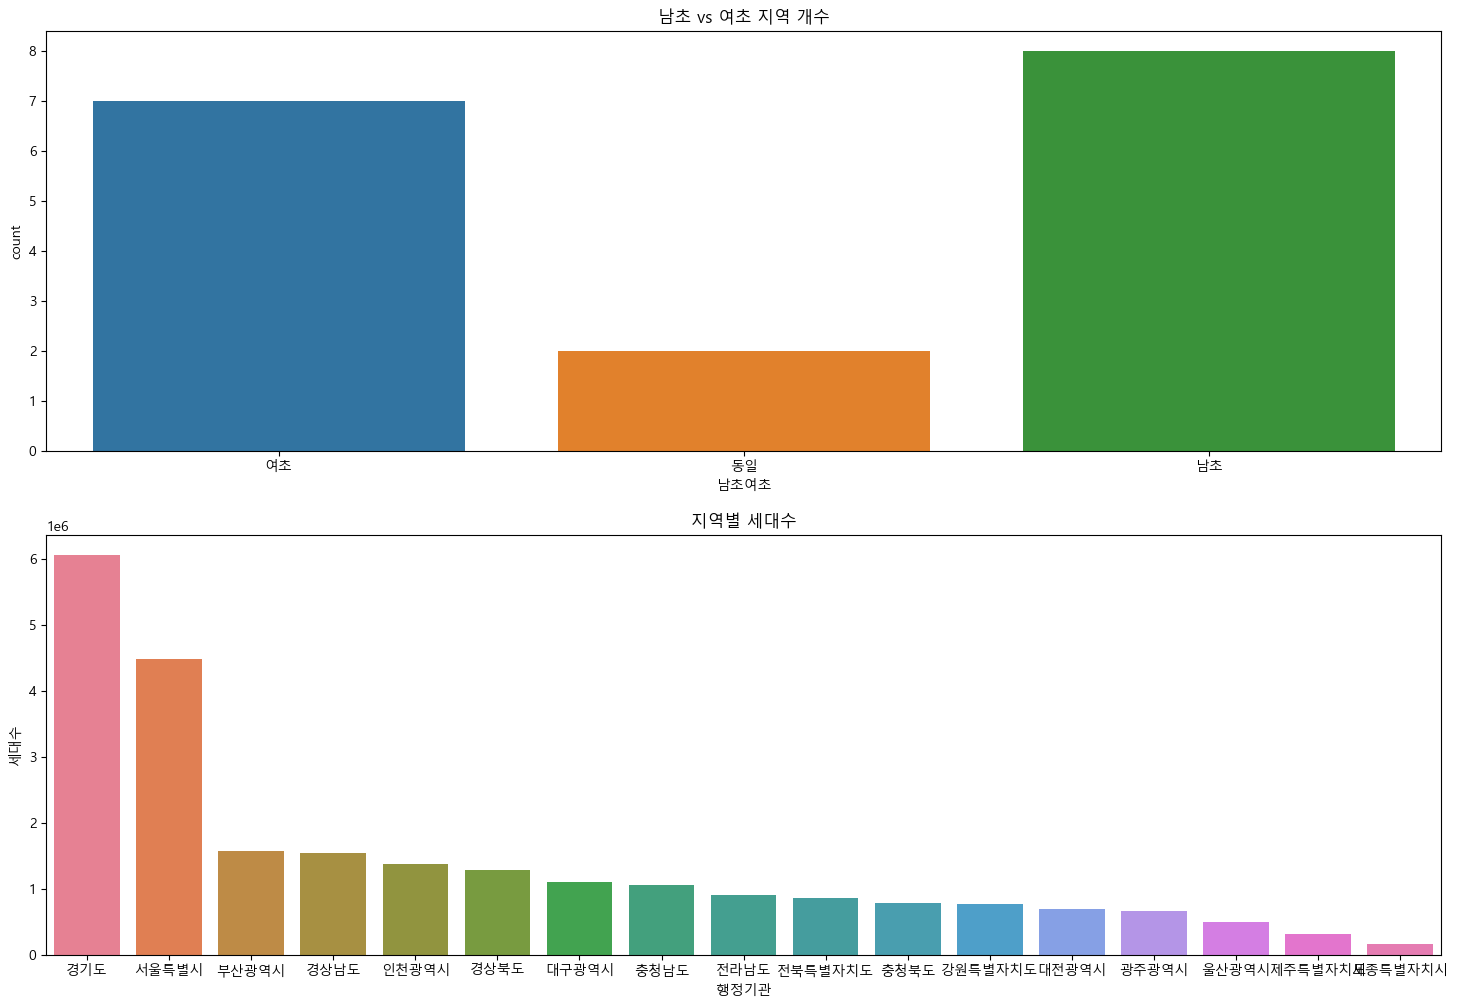

In [116]:
figure,(axes1,axes2) = plt.subplots(nrows=2,ncols=1)
figure.set_size_inches(18,12)

#남초 vs 여초 개수 Plot
gen_count = sns.countplot(data=data,x='남초여초',ax=axes1,hue='남초여초')
gen_count.set_title('남초 vs 여초 지역 개수')
#지역별 세대수 Plot
pop_plot = sns.barplot(data=data.sort_values(by='세대수',ascending=False),x='행정기관',y='세대수',ax=axes2,hue='행정기관')
pop_plot.set_title('지역별 세대수')

### 6. 남자 인구 vs 여자 인구 비교 Plot

Text(0.5, 0, '행정기관')

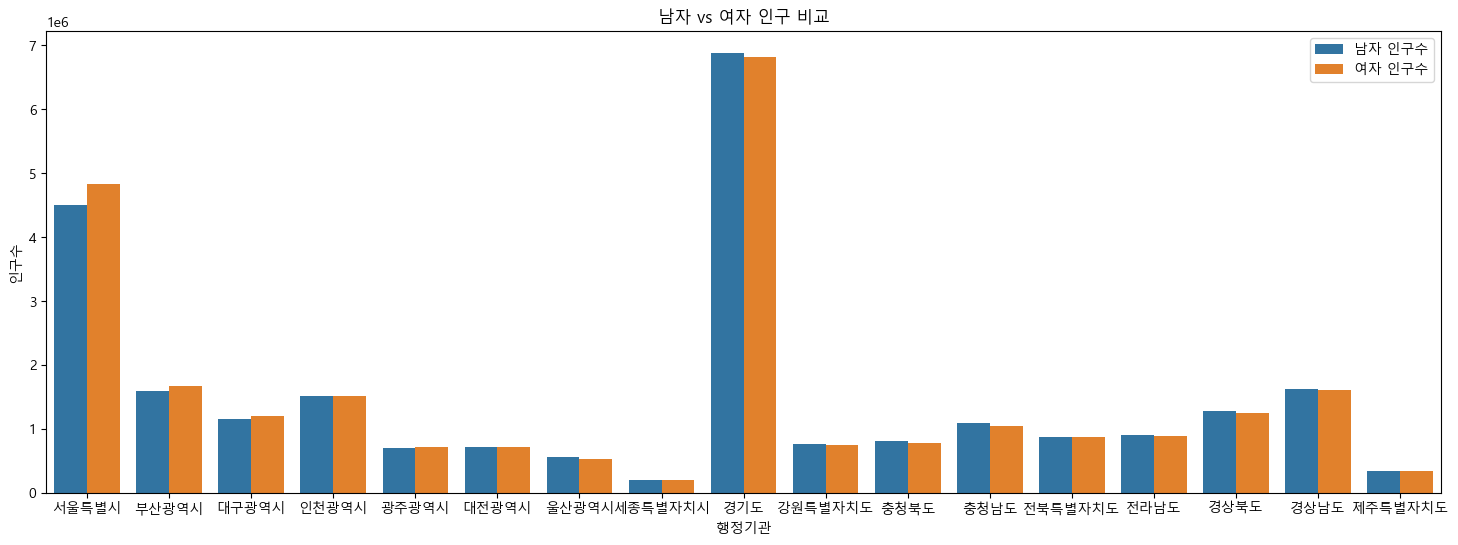

In [117]:
figure, axes1 = plt.subplots(nrows=1, ncols=1)

figure.set_size_inches(18,6)

male = data[['행정기관','남자 인구수']].rename(columns={'남자 인구수':'인구수'})
male['성별'] = '남자 인구수'

female = data[['행정기관','여자 인구수']].rename(columns={'여자 인구수':'인구수'})
female['성별'] = '여자 인구수'

gender = pd.concat([male, female], ignore_index=True)

gen_plot = sns.barplot(data=gender, x='행정기관', y='인구수', ax=axes1, hue='성별')
gen_plot.legend(title=None)
gen_plot.set_title('남자 vs 여자 인구 비교')
gen_plot.set_xlabel('행정기관')